In [79]:
import dotenv
dotenv.load_dotenv()

True

In [80]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI()


In [123]:
def hello(state):
    return {'count': state.get('count')+1}
def hi(state):
    return {'count': state.get('count')+1}
def yo(state):
    return {'count': state.get('count')+1}

In [138]:

from langgraph.graph import StateGraph,MessagesState, START, END
from typing import TypedDict

class MyState(TypedDict):
    count:None
    pass

In [169]:
import random
workflow = StateGraph(MyState)
workflow.add_node("hello", hello)
workflow.add_node("hi", hi)
workflow.add_node("yo", yo)

workflow.add_edge(START, "hello")
workflow.add_edge("hello", "hi")
# workflow.add_edge("hi", "yo")

workflow.add_conditional_edges("hi", lambda x: "gotoyo"if random.randint(0,100)%5 == 0 else "gotohello", dict(gotoyo='yo', gotohello='hello'))
workflow.add_edge("yo", END)

app = workflow.compile()

In [170]:
app.invoke(input=dict(count=1), config=dict(recursion_limit=50))

{'count': 12}

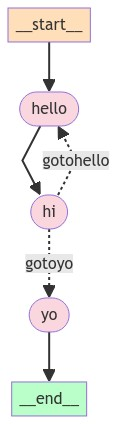

In [134]:
from IPython.display import Image, display

display(Image(app.get_graph(xray=True).draw_mermaid_png()))